In [1]:
## Load libraries
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
plt.style.use('dark_background')
%matplotlib inline

In [2]:
np.set_printoptions(precision=2)

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
tf.__version__

'2.15.0'

---

Mount Google Drive if running in Colab

---

In [5]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Learning/Data Science/Deep Learning/OneDrive-2024-04-01'
    DATA_DIR = DIR + '/Data/'
    os.chdir(DIR)
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


---

Load diabetes data

---

In [6]:
## Load diabetes data
file = DATA_DIR+'diabetes_regression1.csv'
df= pd.read_csv(file, header = 0)

print('Diabetes dataset')
print('-----------')
print('Initial number of samples = %d'%(df.shape[0]))
print('Initial number of features = %d\n'%(df.shape[1]))
df.head(5)

Diabetes dataset
-----------
Initial number of samples = 442
Initial number of features = 11



,AGE,GENDER,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [7]:
## Create lists of ordinal, categorical, and continuous features
#categorical_features =  ['GENDER', 'BMILEVEL']
categorical_features =  ['GENDER']
continuous_features = df.drop(categorical_features, axis = 1).columns.tolist()
print(categorical_features)
print(continuous_features)

['GENDER']
['AGE', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']


---

Assign 'category' datatype to categorical columns

---

In [8]:
## Assign 'category' datatype to ordinal and categorical columns
print(df.dtypes)
df[categorical_features] = df[categorical_features].astype('category')
print('----')
df.dtypes

AGE         int64
GENDER      int64
BMI       float64
BP        float64
S1          int64
S2        float64
S3        float64
S4        float64
S5        float64
S6          int64
Y           int64
dtype: object
----


AGE          int64
GENDER    category
BMI        float64
BP         float64
S1           int64
S2         float64
S3         float64
S4         float64
S5         float64
S6           int64
Y            int64
dtype: object

---

Remove the target variable column from the list of continuous features

---

In [9]:
## Remove the target variable column from the list of continuous features
continuous_features.remove('Y')

In [10]:
## Train and test split of the data
X = df.drop('Y', axis = 1)
y = df['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

num_features = X_train.shape[0]
num_samples = X_train.shape[1]

print('Diabetes data set')
print('---------------------')
print('Number of training samples = %d'%(num_samples))
print('Number of features = %d'%(num_features))

Diabetes data set
---------------------
Number of training samples = 10
Number of features = 353


---

Build pipeline for categorical and continuous features

---

In [11]:
## Build pipeline for categorical and continuous features

# Pipeline object for categorical (features
categorical_transformer = Pipeline(steps = [('onehotenc', OneHotEncoder(handle_unknown = 'ignore'))])

# Pipeline object for continuous features
continuous_transformer = Pipeline(steps = [('scaler', RobustScaler())])

# Create a preprocessor object for all features
preprocessor = ColumnTransformer(transformers = [('continuous', continuous_transformer, continuous_features),
                                                 ('categorical', categorical_transformer, categorical_features)
                                                ],
                                 remainder = 'passthrough'
                                 )

---

Apply preprocessor (fit and transform) to train data followed by transform to test data

---

In [12]:
## Fit and transform train data using preprocessor
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform test data using preprocessor
X_test_transformed = preprocessor.transform(X_test)

---

Define neural network architecture for regression

---

In [13]:
# Define neural network architecture
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train_transformed.shape[1], ), kernel_regularizer = keras.regularizers.l2(l=0.1)),
    layers.Dense(1)
])

In [14]:
# Compile the neural network model
opt = tf.keras.optimizers.Adam(learning_rate = 1e-04)
model.compile(optimizer = opt, loss = 'mean_squared_error')

In [16]:
# Train the model
history = model.fit(X_train_transformed, Y_train, epochs = 1000, batch_size = 32, validation_data=(X_test_transformed, Y_test))

Epoch 1/1000
12/12 [==============================] - 0s 10ms/step - loss: 22250.0859 - val_loss: 20666.1855
Epoch 2/1000
12/12 [==============================] - 0s 17ms/step - loss: 22230.7441 - val_loss: 20649.9414
Epoch 3/1000
12/12 [==============================] - 0s 33ms/step - loss: 22211.6211 - val_loss: 20634.6660
Epoch 4/1000
12/12 [==============================] - 0s 25ms/step - loss: 22193.8203 - val_loss: 20617.8887
Epoch 5/1000
12/12 [==============================] - 0s 15ms/step - loss: 22173.0508 - val_loss: 20600.6074
Epoch 6/1000
12/12 [==============================] - 0s 16ms/step - loss: 22151.4355 - val_loss: 20582.1816
Epoch 7/1000
12/12 [==============================] - 0s 12ms/step - loss: 22130.5312 - val_loss: 20565.8750
Epoch 8/1000
12/12 [==============================] - 0s 11ms/step - loss: 22111.4961 - val_loss: 20549.6055
Epoch 9/1000
12/12 [==============================] - 0s 14ms/step - loss: 22092.2715 - val_loss: 20533.5312
Epoch 10/1000
12/12

---

Plot train and test loss as a function of epoch

---

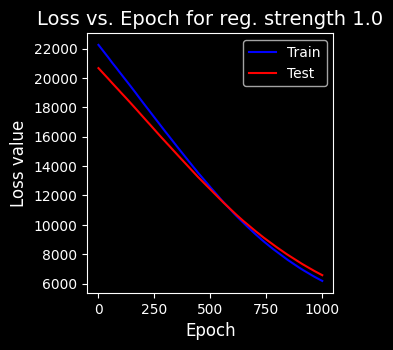

In [17]:
# Plot train and test loss as a function of epoch:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.plot( history.history['loss'], 'b', label = 'Train')
ax.plot( history.history['val_loss'], 'r', label = 'Test')
ax.set_xlabel('Epoch', fontsize = 12)
ax.set_ylabel('Loss value', fontsize = 12)
ax.legend()
ax.set_title('Loss vs. Epoch for reg. strength 1.0', fontsize = 14);

---

Compare the true and predicted values

---

In [18]:
## Compare the true and predicted values
np.column_stack((Y_test, model.predict(X_test_transformed)))

3/3 [==============================] - 0s 3ms/step


array([[ 78.  ,  70.25],
       [152.  ,  42.49],
       [200.  , 119.84],
       [ 59.  ,  27.2 ],
       [311.  , 147.93],
       [178.  , 145.25],
       [332.  , 186.92],
       [132.  ,  67.04],
       [156.  ,  69.59],
       [135.  ,  54.31],
       [220.  , 135.55],
       [233.  , 137.26],
       [ 91.  ,  47.2 ],
       [ 51.  ,  28.6 ],
       [195.  , 163.83],
       [109.  , 138.98],
       [217.  , 158.46],
       [ 94.  ,  41.07],
       [ 89.  , 111.3 ],
       [111.  , 118.14],
       [129.  , 155.52],
       [181.  ,  22.79],
       [168.  ,  46.36],
       [ 97.  ,  43.99],
       [115.  ,  27.94],
       [202.  , 141.73],
       [ 84.  ,  30.53],
       [147.  ,  84.64],
       [253.  , 146.2 ],
       [144.  , 164.92],
       [262.  , 127.32],
       [115.  , 116.38],
       [ 68.  , 158.4 ],
       [ 65.  ,  32.58],
       [252.  ,  39.97],
       [212.  , 175.58],
       [142.  ,  35.12],
       [215.  , 196.73],
       [180.  , 137.33],
       [163.  , 151.06],
